# 数据探查

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

file_path = '/kaggle/input/e-commerce-user-behavior-dataset/ecommerce_user_behavior_dataset.csv'
# 尝试其他常见编码
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        # 尝试GBK编码（常见于中文文件）
        df = pd.read_csv(file_path, encoding='gbk')
    except:
        # 尝试自动检测编码
        import chardet
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
        df = pd.read_csv(file_path, encoding=result['encoding'])

# 读取文件并检测编码
with open(file_path, 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(f"文件编码: {result['encoding']}")


# 查看数据前5行
print("数据前5行：")
display(df.head())

文件编码: GB2312
数据前5行：


,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,每个用户的唯一标识符，便于追踪和分析。,用户的年龄，提供对人口统计偏好的洞察。,用户的性别，使能性别特定的推荐和定位。,用户所在地区：郊区、农村、城市，影响偏好和购物习惯。,用户的收入水平，表明购买力和支付能力。,用户的兴趣，如运动、时尚、技术等，指导内容和产品推荐。,用户上次登录以来的天数，反映参与频率。,用户进行购买的频率，表明购物习惯和忠诚度。,用户下单的平均价值，对定价和促销策略至关重要。,用户消费的总金额，表明终身价值和购买行为。,用户偏好的特定产品类别。,用户在电子商务平台上花费的时间，表明参与程度。,用户在访问期间浏览的页面数量，反映浏览活动和兴趣。,用户是否订阅了营销活动通知。
1,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,TRUE
2,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,FALSE
3,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,TRUE
4,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,FALSE


In [7]:
# 如果需要保留中英文列名对应关系：
# 先读取第一行(英文列名)
with open(file_path, 'r', encoding='gbk') as f:
    en_columns = f.readline().strip().split(',')
    cn_columns = f.readline().strip().split(',')

# 创建列名映射字典
col_mapping = dict(zip(en_columns, cn_columns))
print("\n中英文列名对应关系：")
for en, cn in col_mapping.items():
    print(f"{en}: {cn}")

# 读取实际数据(跳过前两行)
df = pd.read_csv(file_path, 
                skiprows=2, 
                header=None, 
                names=en_columns,
                encoding='gbk')


中英文列名对应关系：
User_ID: 每个用户的唯一标识符，便于追踪和分析。
Age: 用户的年龄，提供对人口统计偏好的洞察。
Gender: 用户的性别，使能性别特定的推荐和定位。
Location: 用户所在地区：郊区、农村、城市，影响偏好和购物习惯。
Income: 用户的收入水平，表明购买力和支付能力。
Interests: 用户的兴趣，如运动、时尚、技术等，指导内容和产品推荐。
Last_Login_Days_Ago: 用户上次登录以来的天数，反映参与频率。
Purchase_Frequency: 用户进行购买的频率，表明购物习惯和忠诚度。
Average_Order_Value: 用户下单的平均价值，对定价和促销策略至关重要。
Total_Spending: 用户消费的总金额，表明终身价值和购买行为。
Product_Category_Preference: 用户偏好的特定产品类别。
Time_Spent_on_Site_Minutes: 用户在电子商务平台上花费的时间，表明参与程度。
Pages_Viewed: 用户在访问期间浏览的页面数量，反映浏览活动和兴趣。
Newsletter_Subscription: 用户是否订阅了营销活动通知。


In [12]:
# 1. 基础信息检查
print(f"数据集形状：{df.shape}")
print("\n前5行数据：")
display(df.head())

# 查看数据基本信息
print("\n数据基本信息：")
print(f"\n各列数据类型：\n{df.dtypes}")

# 检查缺失值
print("\n缺失值统计：")
print(df.isnull().sum())

# 检查重复值
print(f"\n重复行数量：{df.duplicated().sum()}")

# 2. 数据类型转换（确保数值列正确）
numeric_cols = ['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency',
               'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes',
               'Pages_Viewed']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 3. 描述性统计（修正后）
print("\n数值型变量描述统计：")
display(df[numeric_cols].describe())

# 4. 分类变量分析
categorical_cols = ['Gender', 'Location', 'Interests', 'Product_Category_Preference', 'Newsletter_Subscription']
print("\n分类变量统计：")
for col in categorical_cols:
    print(f"\n{col}分布：")
    print(df[col].value_counts(normalize=True))

数据集形状：(1000, 14)

前5行数据：


,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True



数据基本信息：

各列数据类型：
User_ID                        object
Age                             int64
Gender                         object
Location                       object
Income                          int64
Interests                      object
Last_Login_Days_Ago             int64
Purchase_Frequency              int64
Average_Order_Value             int64
Total_Spending                  int64
Product_Category_Preference    object
Time_Spent_on_Site_Minutes      int64
Pages_Viewed                    int64
Newsletter_Subscription          bool
dtype: object

缺失值统计：
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0

,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000



分类变量统计：

Gender分布：
Gender
Male      0.526
Female    0.474
Name: proportion, dtype: float64

Location分布：
Location
Suburban    0.349
Urban       0.344
Rural       0.307
Name: proportion, dtype: float64

Interests分布：
Interests
Sports        0.213
Fashion       0.209
Travel        0.196
Food          0.196
Technology    0.186
Name: proportion, dtype: float64

Product_Category_Preference分布：
Product_Category_Preference
Apparel            0.218
Electronics        0.209
Books              0.198
Home & Kitchen     0.189
Health & Beauty    0.186
Name: proportion, dtype: float64

Newsletter_Subscription分布：
Newsletter_Subscription
True     0.507
False    0.493
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('用户年龄分布')
plt.xlabel('年龄')
plt.ylabel('用户数量')
plt.show()


数据基本信息：
数据集形状：(1000, 14)

各列数据类型：
User_ID                        object
Age                             int64
Gender                         object
Location                       object
Income                          int64
Interests                      object
Last_Login_Days_Ago             int64
Purchase_Frequency              int64
Average_Order_Value             int64
Total_Spending                  int64
Product_Category_Preference    object
Time_Spent_on_Site_Minutes      int64
Pages_Viewed                    int64
Newsletter_Subscription          bool
dtype: object

缺失值统计：
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed   

# 单变量分析

## 用户年龄分布

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


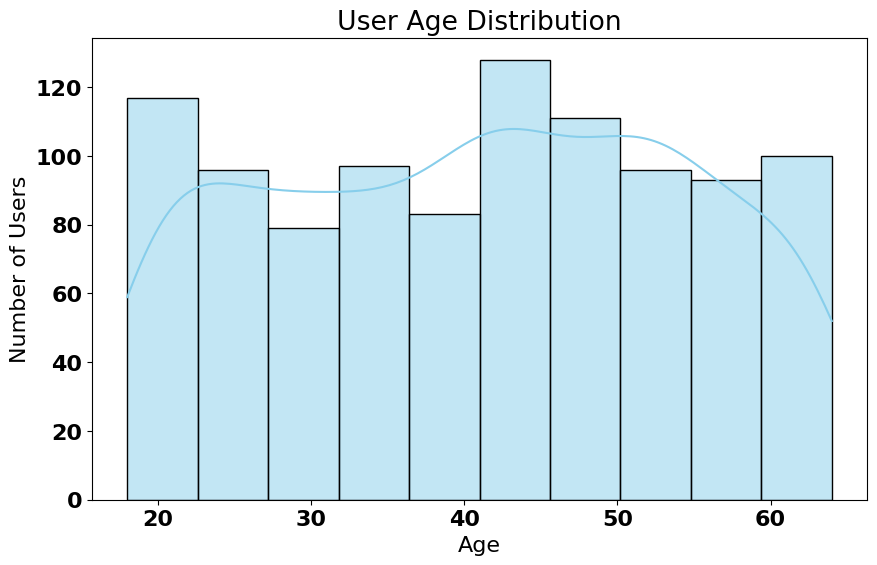

In [29]:
# 如果你想把图标的字体改成中文可以使用如下的代码：
# font = {'family' : 'SimHei',
#         'weight' : 'bold',
#         'size'   : '16'}
# plt.rc('font', **font)               # 步骤一（设置字体的更多属性）
# plt.rc('axes', unicode_minus=False)  # 步骤二（解决坐标轴负数的负号显示问题）

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## 用户性别分布

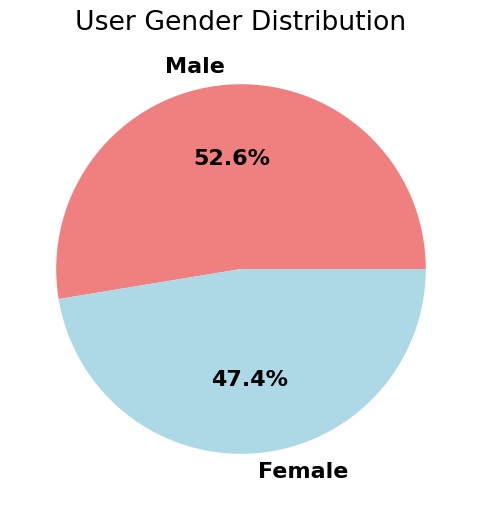

In [20]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('User Gender Distribution')
plt.ylabel('')
plt.show()

## 地理位置分布

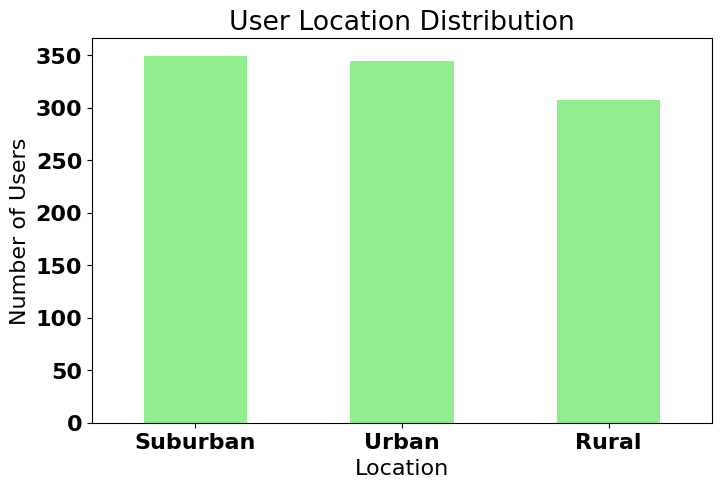

In [24]:
plt.figure(figsize=(8, 5))
df['Location'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('User Location Distribution')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

## 收入分布

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


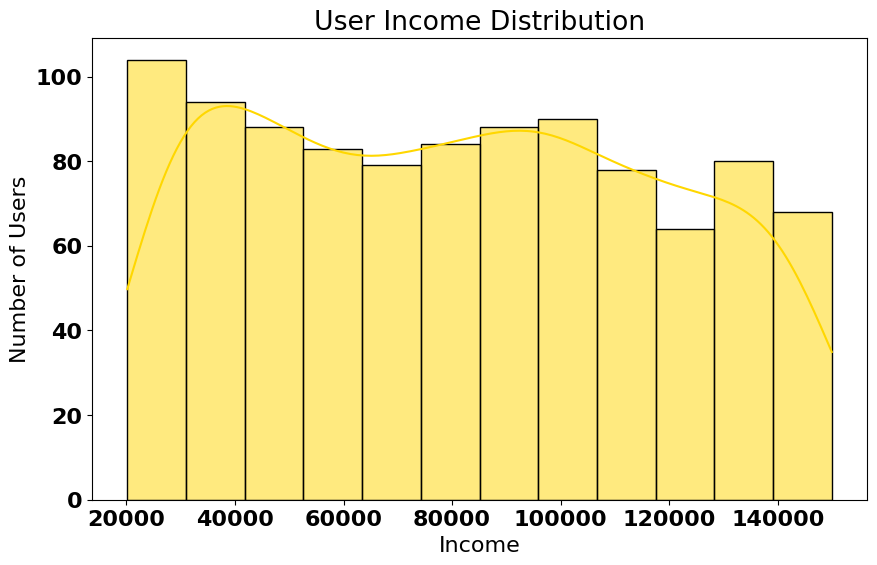

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=12, kde=True, color='gold')
plt.title('User Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Users')
plt.show()

## 产品类别偏好

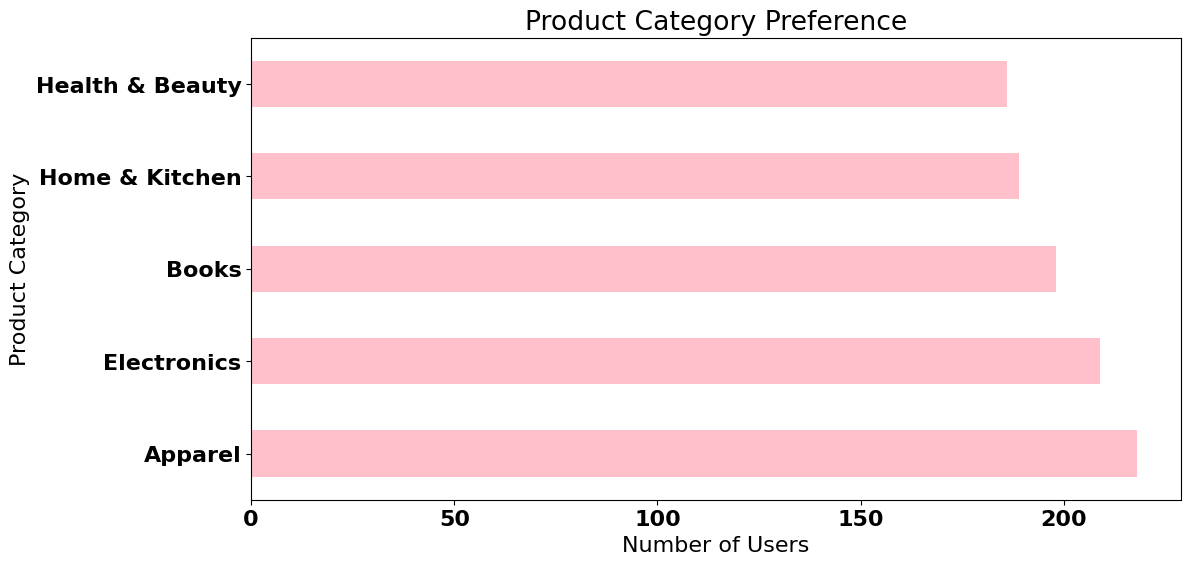

In [31]:
plt.figure(figsize=(12, 6))
df['Product_Category_Preference'].value_counts().head(10).plot(kind='barh', color='pink')
plt.title('Product Category Preference')
plt.xlabel('Number of Users')
plt.ylabel('Product Category')
plt.show()

# 多变量分析

## 收入与总消费金额关系

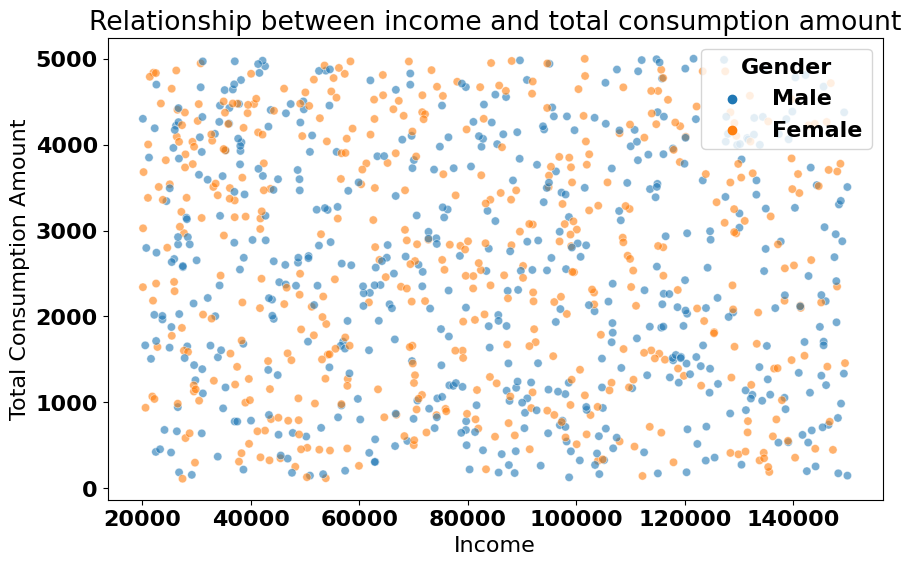

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spending', hue='Gender', data=df, alpha=0.6)
plt.title('Relationship between income and total consumption amount')
plt.xlabel('Income')
plt.ylabel('Total Consumption Amount')
plt.show()

## 各年龄段平均订单价值

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


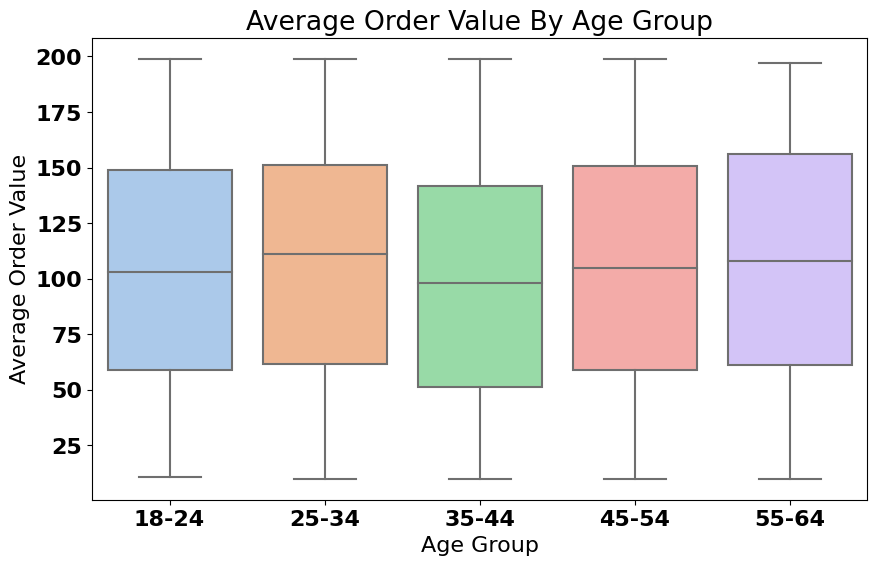

In [34]:
# 创建年龄分段
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], 
                        labels=['18-24', '25-34', '35-44', '45-54', '55-64'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Average_Order_Value', data=df, palette='pastel')
plt.title('Average Order Value By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.show()

## 不同地区用户兴趣热力图

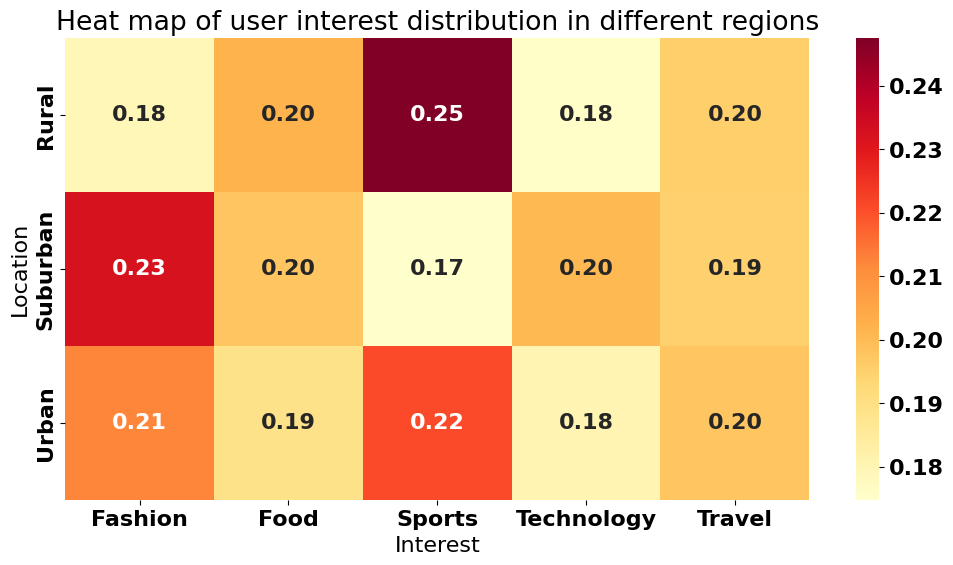

In [35]:
cross_tab = pd.crosstab(df['Location'], df['Interests'], normalize='index')
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Heat map of user interest distribution in different regions')
plt.xlabel('Interest')
plt.ylabel('Location')
plt.show()